In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv("D:\STUDY\Project\\train(loan prediction)hackathon.csv")
df_test = pd.read_csv("D:\STUDY\Project\\test_loan_prediction_hackthon.csv")

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df_train.shape

(614, 13)

In [8]:
df_test.shape

(367, 12)

In [9]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# data preprocessing

In [12]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
# fill the missing values for categorical terms - mode
df_train['Gender'] = df_train["Gender"].fillna(df_train['Gender'].mode()[0])
df_train['Married'] = df_train["Married"].fillna(df_train['Married'].mode()[0])
df_train['Dependents'] = df_train["Dependents"].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed'] = df_train["Self_Employed"].fillna(df_train['Self_Employed'].mode()[0])


In [15]:
df_test['Gender'] = df_test["Gender"].fillna(df_test['Gender'].mode()[0])
df_test['Married'] = df_test["Married"].fillna(df_test['Married'].mode()[0])
df_test['Dependents'] = df_test["Dependents"].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed'] = df_test["Self_Employed"].fillna(df_test['Self_Employed'].mode()[0])


In [16]:
# fill the missing values for numerical terms - mean
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean())
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mean())

In [17]:
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean())
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].mean())

In [18]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

visualizing Categorial values

<AxesSubplot:xlabel='Gender', ylabel='count'>

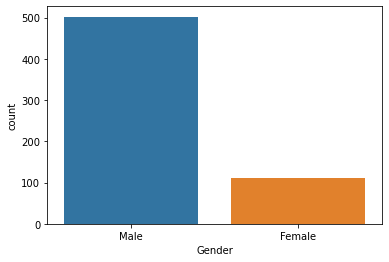

In [20]:
sns.countplot(df_train['Gender'])

We have ploted here total counts of the column "Gender" of our dataset,& as we can see there are more no of "Male" applicants than the "Female" applicants.

<AxesSubplot:xlabel='Married', ylabel='count'>

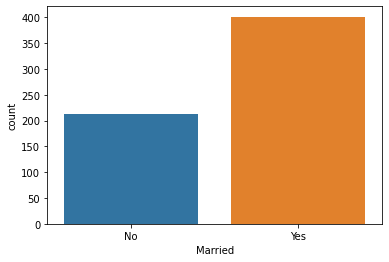

In [21]:
sns.countplot(df_train["Married"])

Here we have ploted graph of Married and Unmarried people's counts & we can see that no of married peoples is more than the Unmarried peoples

<AxesSubplot:xlabel='Dependents', ylabel='count'>

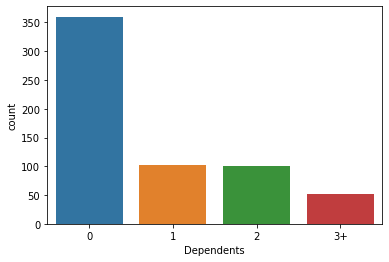

In [22]:
sns.countplot(df_train['Dependents'])

This graph shows no of Dependents on loan applicant this graph shows us that people with 0 Dependents are more 
while persons with more than 3 dependents is least of all. 
Applicants having 1 and 2 dependents are almost equal.


<AxesSubplot:xlabel='Education', ylabel='count'>

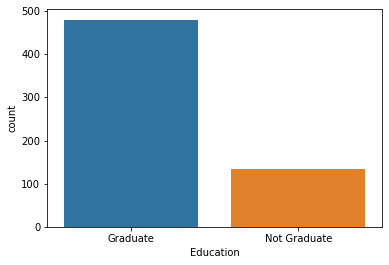

In [23]:
sns.countplot(df_train['Education'])


Here we've ploted education details i.e whether the applicant is "Graduate" or "Not Graduate".
So the graph says that no gratuated applicants is more than the Non-graduate applicants

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

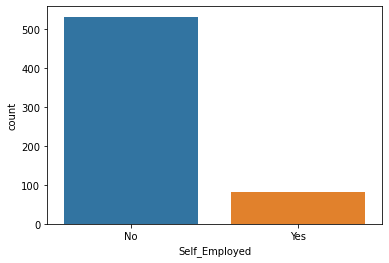

In [24]:
sns.countplot(df_train['Self_Employed'])

This graph says that no of self_employed persons is very few as compared to the applicants who are not self-employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

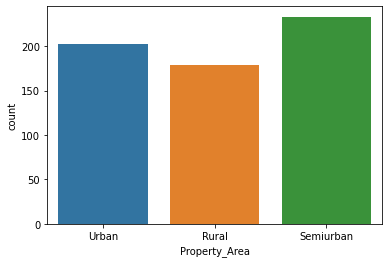

In [25]:
sns.countplot(df_train['Property_Area'])

Here we've ploted "Property_area" for which the loan is applied for. So we can say that most of the  properties are situated in Semiurban area compared to Urban and Rural area.

# visualizing numerical values

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

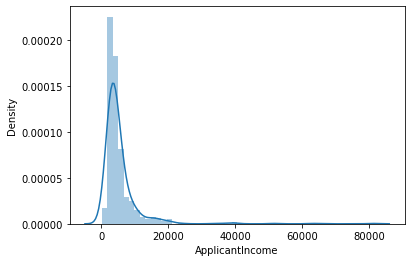

In [26]:
sns.distplot(df_train['ApplicantIncome'])

We can see Applicant Income is right skewed. A right-skewed distribution has a long right tail.
Right-skewed distributions are also called positive-skew distributions. 
That's because there is a long tail in the positive direction on the number line.
If the histogram is skewed right, the mean is greater than the median.(i.e. mean>median)
This is the case because skewed-right data have a few large values that drive the mean upward but do not affect where the 
exact middle of the data is (that is, the median).

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

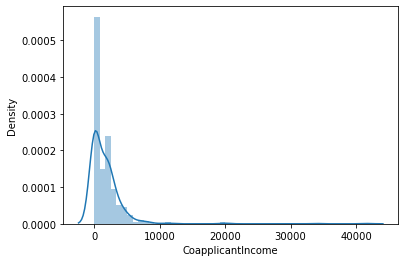

In [27]:
sns.distplot(df_train['CoapplicantIncome'])

This is also a right skewed data.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

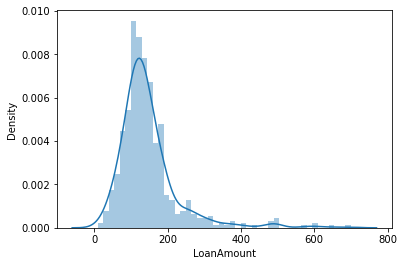

In [28]:
sns.distplot(df_train['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

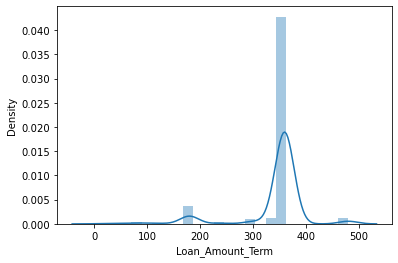

In [29]:
sns.distplot(df_train['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

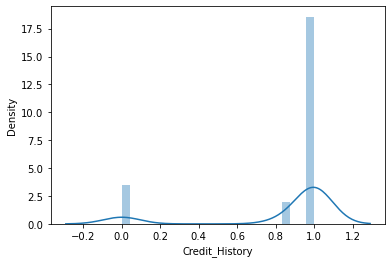

In [30]:
sns.distplot(df_train['Credit_History'])

# Creation of new attribute

In [31]:
# total income
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [32]:
# total income
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276


# Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

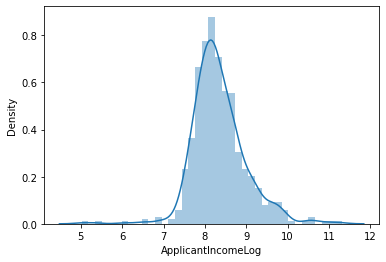

In [33]:
df_train['ApplicantIncomeLog'] = np.log(df_train['ApplicantIncome']+1)
sns.distplot(df_train["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

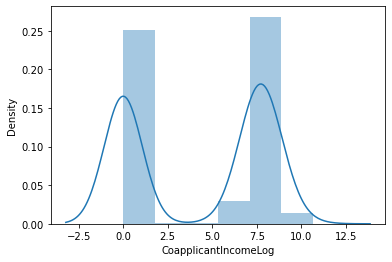

In [34]:
df_train['CoapplicantIncomeLog'] = np.log(df_train['CoapplicantIncome']+1)
sns.distplot(df_train["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

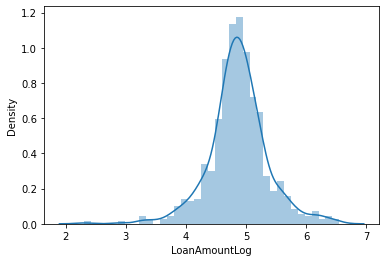

In [35]:
df_train['LoanAmountLog'] = np.log(df_train['LoanAmount']+1)
sns.distplot(df_train["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

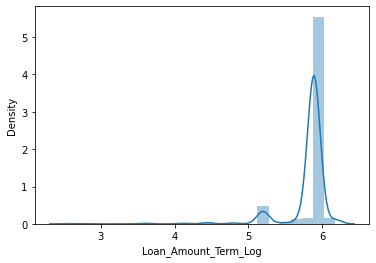

In [36]:
df_train['Loan_Amount_Term_Log'] = np.log(df_train['Loan_Amount_Term']+1)
sns.distplot(df_train["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

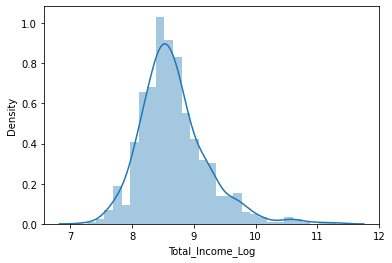

In [37]:
df_train['Total_Income_Log'] = np.log(df_train['Total_Income']+1)
sns.distplot(df_train["Total_Income_Log"])

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])

In [39]:
df_train = df_train.drop(columns="Loan_ID",axis=1)

In [40]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'CoapplicantIncomeLog']
df_train = df_train.drop(columns=cols, axis=1)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [41]:
df_train.tail()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
609,0,0,0,0,0,1.0,0,1,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,1,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,1,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,1,8.933796,5.236442,5.888878,8.933796
613,0,0,0,0,1,0.0,1,0,8.430327,4.897840,5.888878,8.430327


# Ploting Correlations

<AxesSubplot:>

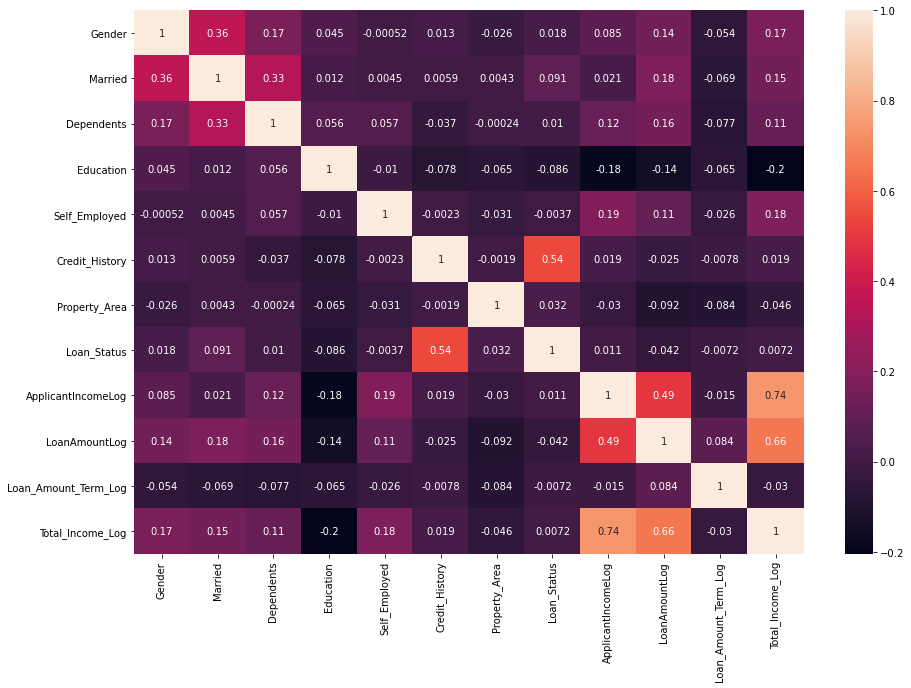

In [42]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

# Splitting the input and output attributes

In [43]:
# specify input and output attributes
x_train = df_train.drop(columns=['Loan_Status'], axis=1)
y_train = df_train['Loan_Status']
X_test = df_test[["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Total_Income"]]
#y_test = df_test['Loan_Status']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [45]:
#Combining both train and test dataset
#Create a flag for Train and Test Data set
df_train['Type']='Train' 
df_test['Type']='Test'
fullData = pd.concat([df_train,df_test],axis=0, sort=True)
#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome         614
ApplicantIncomeLog      367
CoapplicantIncome       614
Credit_History            0
Dependents                0
Education                 0
Gender                    0
LoanAmount              614
LoanAmountLog           367
Loan_Amount_Term        614
Loan_Amount_Term_Log    367
Loan_ID                 614
Loan_Status             367
Married                   0
Property_Area             0
Self_Employed             0
Total_Income            614
Total_Income_Log        367
Type                      0
dtype: int64

In [46]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmountLog'].fillna(fullData['LoanAmountLog'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)
#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)
fullData = fullData.drop(columns=["Total_Income","Total_Income_Log"],axis=1)

<AxesSubplot:>

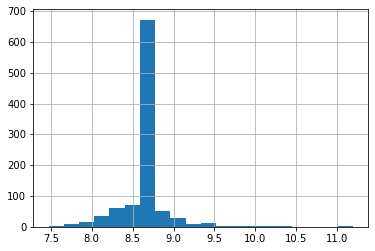

In [47]:
#Create a new column as Total Income
fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']
fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])
#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [48]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [49]:
#create label encoders for categorical features
for var in cat_cols:
    lbe = LabelEncoder()
    fullData[var] = lbe.fit_transform(fullData[var].astype('str'))
train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = lbe.fit_transform(train_modified["Loan_Status"].astype('str'))

# Model Training

In [50]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x_train, y_train):
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x_test, y_test, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x_train,y_train)

Accuracy is 77.27272727272727
Cross validation is 75.95698924731182


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classify(model,x_train,y_train)

Accuracy is 74.67532467532467
Cross validation is 71.3763440860215


In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x_train,y_train)

Accuracy is 77.92207792207793
Cross validation is 72.66666666666667


In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x_train,y_train)

Accuracy is 72.07792207792207
Cross validation is 70.75268817204301


In [55]:
from sklearn.svm import SVC
model = SVC()
classify(model,x_train,y_train)

Accuracy is 64.93506493506493
Cross validation is 64.94623655913978


In [56]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model,x_train,y_train)

Accuracy is 72.72727272727273
Cross validation is 69.48387096774192


In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model,x_train,y_train)

Accuracy is 77.27272727272727
Cross validation is 75.31182795698925


From above results it is clear that Random forest classifier is ids having highest Accuracy amongs all other classifier models so we will use Random Forest Classifier for making predictions.

# Hyperparameter Tunning

In [58]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=10)
classify(model,x_train,y_train)

Accuracy is 77.27272727272727
Cross validation is 76.6236559139785


In [59]:
y_pred= model.predict(x_test)
y_pred = lbe.inverse_transform(y_pred)
#test_modified['Loan_Status']=y_pred
#outcome_var = 'Loan_Status'

In [60]:
print(y_pred)

['1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0'
 '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0'
 '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0'
 '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0'
 '0.0' '0.0' '1.0' '1.0' '0.0' '1.0' '1.0' '0.0' '1.0' '1.0' '0.0' '1.0'
 '0.0' '1.0' '0.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0'
 '1.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '1.0' '1.0' '1.0' '1.0'
 '1.0' '1.0' '1.0' '0.0' '1.0' '1.0' '1.0' '0.0' '0.0' '1.0' '1.0' '1.0'
 '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '0.0'
 '1.0' '1.0' '1.0' '0.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0'
 '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '1.0' '0.0' '1.0'
 '1.0' '0.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0'
 '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0']


In [61]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 3, 97]], dtype=int64)

<AxesSubplot:>

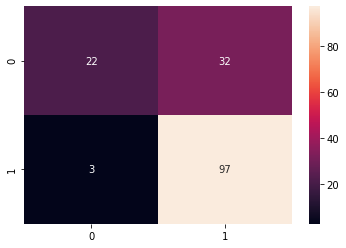

In [62]:
sns.heatmap(cm, annot=True)

In [63]:
import pickle

In [64]:
#file = "Trained_model"
pickle.dump(model,open("model.pkl",'wb'))

In [65]:
model = pickle.load(open('model.pkl','rb'))

In [75]:
print(model.predict(x_test))

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1]


In [76]:
x_test.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')